<a href="https://colab.research.google.com/github/steinjun0/picture-photo_categorize_AI/blob/master/picture_photo_categorize_AI_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://taewan.kim/post/numpy_cheat_sheet/
# numpy 배열 함수들 정리 참고!!
# https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
# 블로그 확인

In [0]:
# https://bryan7.tistory.com/1077
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
!ls drive/My\ Drive/Programming_Source/Images
images = np.load("./drive/My Drive/Programming_Source/Images/Images100.npy")

drawing_pictures_model100.h5  Drawings	Images100.npy  Pictures  Result


In [0]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)


TensorFlow 2.x selected.
2.1.0


In [0]:

# http://taewan.kim/post/numpy_cheat_sheet/
# numpy 배열 함수들 정리 참고!!



import tensorflow as tf
from tensorflow import keras
import os # miscellaneous operating system interfaces
import shutil # high-level file operations

from operator import eq
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LSTM
from tensorflow.keras.layers import BatchNormalization

targetsize = 100

def get_image_from_dir(dir_path, img_list):
    for n, img_name in enumerate(os.listdir(dir_path)):
        print(n, img_name[-3:])
        if not eq(img_name[-3:] ,'jpg') and not eq(img_name[-3:], 'png'): continue
        
        img_path = os.path.join(dir_path, img_name)
        img = image.load_img(img_path, target_size=(targetsize, targetsize))
        img_tensor = image.img_to_array(img)
        img_tensor /= 255

        img_list.append(img_tensor)

def make_sources(dir_path, drawings, pictures):
    get_image_from_dir(os.path.join(dir_path, 'Drawings'), drawings)
    get_image_from_dir(os.path.join(dir_path, 'Pictures'), pictures)

    drawings = np.array(drawings)
    pictures = np.array(pictures)

    drawings = np.insert(drawings, 0, 0, axis=1)    
    pictures = np.insert(pictures, 0, 1, axis=1)                                                
    images = np.concatenate((drawings, pictures), axis=0)
    np.random.shuffle(images)
    return images                       

def show_filter(filters, n_filters, ix):
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters/3, 32, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()


In [0]:
dir_path = '/content/drive/My Drive/Programming_Source/Images'

#이미지 파일이 존재한다면 그걸 로드해서 전처리 시간을 줄인다. 없다면 새로 만들어서 저장한다.
#if os.path.isfile(os.path.join(dir_path,'images'+str(targetsize)+'.npy')): 
# images = np.load('/content/drive/My Drive/Programming_Source/Images/images'+str(targetsize)+'.npy')
# else:
#     drawings = []
#     pictures = []
#     images = make_sources(dir_path, drawings, pictures)

#     np.save('D:\Video&Photo\Galaxy S10\Download\images'+str(targetsize), images) # images.npy


answer_labels = images[:, 0, 0, 0]               #각각의 데이터에서 라벨을 분리
images = np.delete(images, 0, axis=1)
                                                
train_images = images[:-1000]
train_labels = answer_labels[:-1000]
test_images = images[-1000:]
test_labels = answer_labels[-1000:]

In [0]:
from keras.utils.np_utils  import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [0]:


# #데이터 전처리 완료!

model = keras.Sequential([
    Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=(targetsize, targetsize ,3), kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(64, (10, 10), padding='same', activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(128, (10, 10), padding='same', activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(256, (5, 5), padding='same', activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(512, (5, 5), padding='same', activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    # Dropout(0.5),
    # Dense(256, activation='relu', kernel_initializer='he_normal'),
    # BatchNormalization(),
    # Dropout(0.5),
    # Dense(256, activation='relu', kernel_initializer='he_normal'),
    # BatchNormalization(),
    # Dense(256, activation='relu', kernel_initializer='he_normal'),
    # BatchNormalization(),
    # Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dense(2, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

model.save('./drive/My Drive/Programming_Source/Images/drawing_pictures_model'+str(targetsize)+'.h5')


In [0]:
#model.fit_generator(datagen.flow(train_images, one_hot_train_labels, batch_size=200),
#                   steps_per_epoch=len(train_images) / 200, epochs=5)


model.fit(train_images, one_hot_train_labels,batch_size=200, epochs=30)

model.save_weights('./drive/My Drive/Programming_Source/Images/drawing_pictures_model'+str(targetsize)+'weights'+'.h5')

model.summary()

###################################################################
# model = load_model('drawing_pictures_model'+str(targetsize)+'.h5')

Train on 20156 samples
Epoch 1/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.3160 - accuracy: 0.8669
Epoch 2/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.3014 - accuracy: 0.8766
Epoch 3/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2877 - accuracy: 0.8803
Epoch 4/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2750 - accuracy: 0.8844
Epoch 5/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2638 - accuracy: 0.8935
Epoch 6/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2614 - accuracy: 0.8911
Epoch 7/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2494 - accuracy: 0.8979
Epoch 8/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2384 - accuracy: 0.9055
Epoch 9/30
20156/20156 [==============================] - 41s 2ms/sample - loss: 0.2341 - accuracy: 0.9053
Epoch 10/30
20

In [0]:
test_loss, test_acc = model.evaluate(test_images, one_hot_test_labels, verbose=2)

print('\nAccuracy of test', test_acc)

test_result = model.predict(test_images)
#print(test_result)


1000/1000 - 1s - loss: 0.5832 - accuracy: 0.8420

Accuracy of test 0.842


In [0]:


plt.rcParams['figure.figsize'] = (15, 15)

filters, biases = model.layers[0].get_weights()
n_filters, ix = 32, 1
show_filter(filters, n_filters, ix)

filters, biases = model.layers[4].get_weights()
n_filters, ix = 64, 1
show_filter(filters, n_filters, ix)

filters, biases = model.layers[8].get_weights()
n_filters, ix = 128, 1
show_filter(filters, n_filters, ix)

filters, biases = model.layers[12].get_weights()
n_filters, ix = 256, 1
show_filter(filters, n_filters, ix)


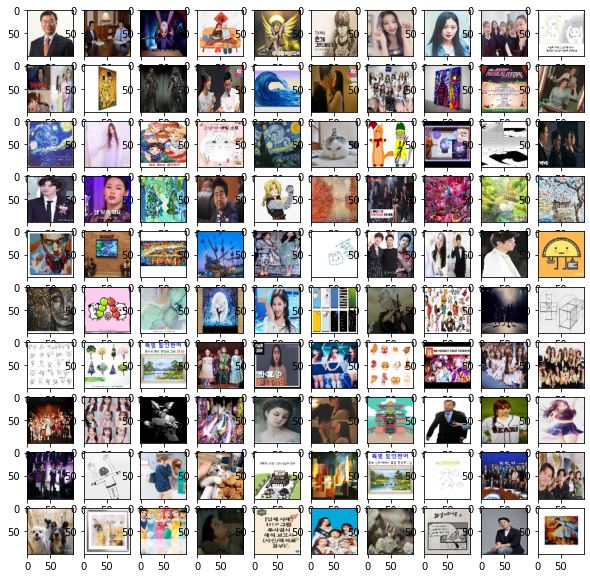

In [0]:

# g=2
# plt.rcParams['figure.figsize'] = (10, 10) # set figure size
# for i in range(g**2):
#     #if (i>=len(pictures)): break    
#     plt.subplot(g, g, i+1)
#     plt.imshow(filters[:,:,:,i])
# plt.show()


plt.rcParams['figure.figsize'] = (10, 10) # set figure size
# g = 5
# for i in range(g**2):
#     if (i>=len(images)): break
#     plt.subplot(g, g, i+1)
#     plt.imshow(images[i])     #첫 번째 배열에 0(drawing)/1(picture) 이 들어가서 검/흰 줄이 생김
# plt.show()                          #그래서 한 칸 뒤에서 부터 표시를 해야한다.
# for i in range(g**2):
#     if (i>=len(pictures)): break    
#     plt.subplot(g, g, i+1)
#     plt.imshow(pictures[i])
# plt.show()

g=10
plt.grid(False)
for i in range(g**2):
    if (i>=len(test_images)): break
    plt.subplot(g, g, i+1)

    plt.imshow(test_images[i])
plt.show()



In [0]:
for i, result in enumerate(test_result):
  print(i)
  result = np.argmax(result)
  image.save_img('./drive/My Drive/Programming_Source/Images/Result/'+str(result)+str(i)+'.jpg', test_images[i])
#print(test_result)


NameError: ignored